# Feature engineering and model training
In this notebook, I select the features and train the machine learning mmodel.
Based on the literature, I will use a random forest regressor, as the scope of this project is not
the training itself, but the MLOps lifecycle.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Read the data
There's no need to clean the data because it was already clean in the scripts "make_dataset.py" and "clean_dataset.py",
so in this notebook we only focus on importing the data and selecting the features.
Although we'll need to make some processing on the categorical variables.

In [2]:
df = pd.read_csv("../data/processed/final_data.csv")

In [3]:
df.head()

,player_id,fifa_version,fifa_update,update_as_of,short_name,long_name,potential,value_eur,age,height_cm,...,international_reputation,club_position,player_positions,pace,shooting,passing,dribbling,defending,physic,value_eur_log
0,231747,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,94,181500000.0,24,182,...,5,LW,"ST, LW",97.0,90.0,80.0,92.0,36.0,78.0,19.016766
1,239085,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,94,185000000.0,22,195,...,5,ST,ST,89.0,93.0,66.0,80.0,45.0,88.0,19.035866
2,192985,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,91,103000000.0,32,181,...,5,SUB,"CM, CAM",72.0,88.0,94.0,87.0,65.0,78.0,18.450240
3,158023,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,90,41000000.0,36,169,...,5,RF,"CF, CAM",80.0,87.0,90.0,94.0,33.0,64.0,17.529083
4,165153,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,90,51000000.0,35,185,...,5,RS,"CF, ST",79.0,88.0,83.0,87.0,39.0,78.0,17.747336


In [4]:
# just making sure that there are not any missing values
df.isna().any()

player_id                   False
fifa_version                False
fifa_update                 False
update_as_of                False
short_name                  False
long_name                   False
potential                   False
value_eur                   False
age                         False
height_cm                   False
weak_foot                   False
international_reputation    False
club_position               False
player_positions            False
pace                        False
shooting                    False
passing                     False
dribbling                   False
defending                   False
physic                      False
value_eur_log               False
dtype: bool

## Select the features and the target variable
The features are

**Potential:** Number 0-99, how good a player can become in the future

**age:** The player's age

**height_cm:** The player's height in cm

**weak_foot:** Integer 1-5, how good a player is with his weak foot

**international_reputation:** Integer 1-5 indicating the popularity of the player and international prestige

--- main atriutes ---

**pace:** 0-99

**shooting:** 0-99

**passing:** 0-99

**dribbling:** 0-99

**defending:** 0-99

**physic:** 0-99

The target variable is **value_eur** the player's value in the market in euros, converted to log values
the target feature is named

**value_eur_log**

In [5]:
# features
features = ['age', 'height_cm', 'weak_foot', 'international_reputation', 'potential',
            'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

target_variable = ['value_eur_log']

In [6]:
# The features X and the target variable y
# Converting also the height_cm and potential to a float
df[['height_cm', 'potential']] = df[['height_cm', 'potential']].astype(float) 

X = df[features]
y = df[target_variable]

In [7]:
X.dtypes

age                           int64
height_cm                   float64
weak_foot                     int64
international_reputation      int64
potential                   float64
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
dtype: object

In [8]:
y.dtypes

value_eur_log    float64
dtype: object

## Split training data and test data
I'll use 80% of the data for training and 20% for testing, split randomly

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=501) 


## Training the model

In [42]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=30, max_depth=10,random_state=143) 

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

/opt/anaconda3/envs/fifa-prices/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=30, random_state=143)

## Evaluation

In [37]:
# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse) 

R-squared: 0.9339756668929027
Mean Squared Error: 0.1173385641026373


This will be sufficient for our purposes, because this project is focused on mlops and deployment not on model training.

## Feature Importances

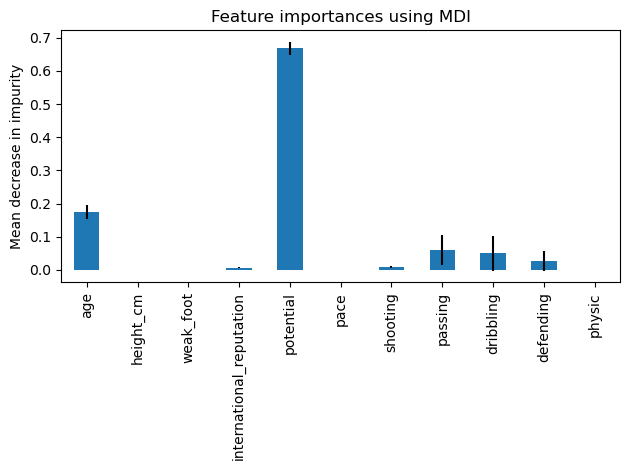

In [43]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig("/Users/hugo/PyProjects/fifa-players-prices/fifa_players_prices/reports/figures/feature_importance_max-depth-10_n_estimators-30.png")

In [44]:
rf_regressor.feature_importances_

array([1.75891011e-01, 4.58738074e-04, 1.09408055e-04, 7.35697496e-03,
       6.67992848e-01, 6.66945187e-04, 8.99485292e-03, 6.02578839e-02,
       4.99965134e-02, 2.71392503e-02, 1.13557353e-03])

This plot indicates that the most important features to determine the value of a player are the age and the potential, which makes sense because a young player with high potential has a high probability of being top player for many years. Following, the other important features are passing, dribbling and defending.